In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#kernel density estimation
from scipy.stats import gaussian_kde
plt.rcParams['figure.figsize'] = [10, 5]

In [3]:
#read in files x, y, z, and metallicity
#in kpc, x from the position of our sun to GC.
df=pd.read_csv('df2.txt')

In [4]:
#read each column
x=df['X'].tolist()
y=df['Y'].tolist()
z=df['Z'].tolist()

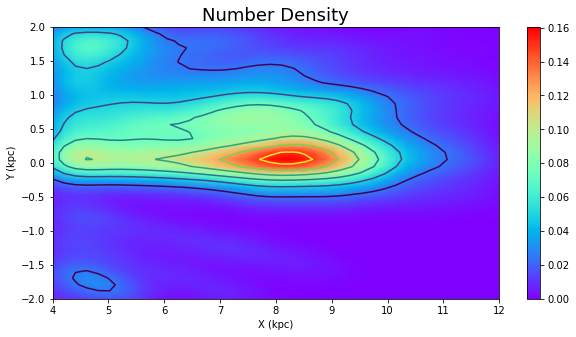

In [5]:
#create data
data = np.vstack([x, y])
nbins=40

# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k = gaussian_kde(data)
xi, yi = np.mgrid[np.min(x):np.max(x):nbins*1j, np.min(y):np.max(y):nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

# contour
plt.title('Number Density',fontsize=18)
plt.xlabel('X (kpc)')
plt.ylabel('Y (kpc)')
gci=plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap='rainbow')
plt.contour(xi, yi, zi.reshape(xi.shape))
plt.colorbar(gci)
plt.show()

In [6]:
# pop1: 0 < z < 0.3 kpc
def pop1(array1, array2):
    x = []
    for i in range(len(array2)):
        if (0<array2[i]<0.6):
            x.append(array1[i])
    return x

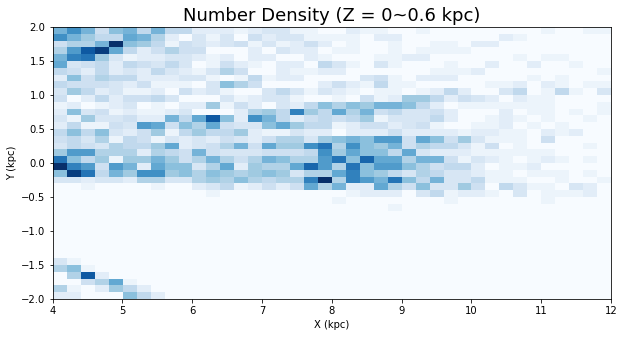

In [7]:
#pop1
x=pop1(x,z)
y=pop1(y,z)
nbins=40

plt.title('Number Density (Z = 0~0.6 kpc)',fontsize=18)
plt.xlabel('X (kpc)')
plt.ylabel('Y (kpc)')
plt.hist2d(x, y, bins=nbins, cmap='Blues')
plt.show()